### Практическое задание

Используем набор примеров fashion-MNIST

    Опишите - какой результата получен в нейросети в зависимости от:
        числа нейронов в слое(для 2-хслойной сети),
        числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
        фиксируйте для тренировочного и тестового набора метрики accuracy.

    Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

    Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

    Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.



### Подключение библиотек и скриптов

In [92]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
%matplotlib inline

In [93]:
plt.rcParams.update({'font.size': 14})
pd.set_option('precision', 3)
pd.set_option('max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 300)

### Загрузка данных

In [94]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

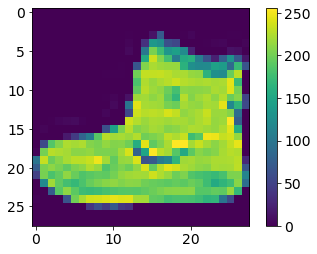

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [95]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [96]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

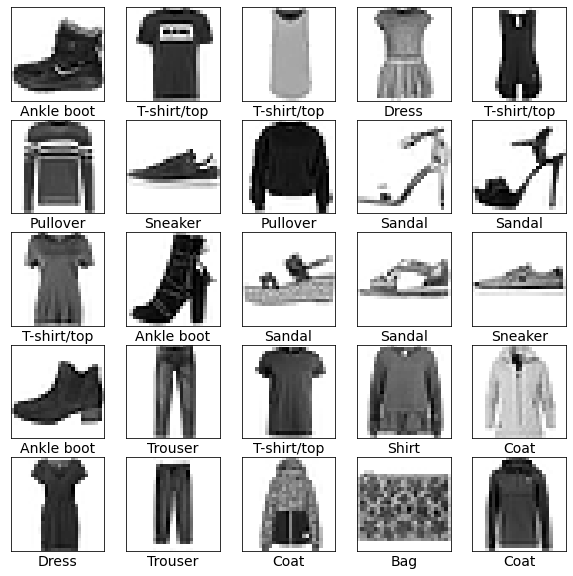

In [97]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 1. Проверка количества нейронов в слое

In [98]:
train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
train_images.shape

(60000, 784)

In [123]:
def model_fash(layers_count, neurons_count):
    for i in range (0,layers_count-1):
        neur=neurons_count[i]
        md = Sequential([keras.layers.Dense(neur, activation=tf.nn.relu)])
        print(f"Слоев: {layers_count}, нейронов в слое: {neur}")
    md.add(Dense(10, activation='softmax'))
    
    
    return md

0 64


In [126]:
history=[]
for i in [32, 64, 128]:
    model=model_fash(2, [i, 10])
    model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])                 
    history.append(model.fit(train_images, train_labels, verbose=1, epochs=10))
    score = model.evaluate(train_images, train_labels, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    

Слоев: 2, нейронов в слое: 32
Epoch 1/10
1875/1875 [==============================] - 2s 676us/step - loss: 0.7049 - accuracy: 0.7554
Epoch 2/10
1875/1875 [==============================] - 1s 680us/step - loss: 0.4268 - accuracy: 0.8482
Epoch 3/10
1875/1875 [==============================] - 1s 667us/step - loss: 0.3904 - accuracy: 0.8600
Epoch 4/10
1875/1875 [==============================] - 1s 669us/step - loss: 0.3624 - accuracy: 0.8702
Epoch 5/10
1875/1875 [==============================] - 1s 654us/step - loss: 0.3491 - accuracy: 0.8750
Epoch 6/10
1875/1875 [==============================] - 1s 660us/step - loss: 0.3344 - accuracy: 0.8793
Epoch 7/10
1875/1875 [==============================] - 1s 668us/step - loss: 0.3217 - accuracy: 0.8844
Epoch 8/10
1875/1875 [==============================] - 1s 672us/step - loss: 0.3148 - accuracy: 0.8851
Epoch 9/10
1875/1875 [==============================] - 1s 671us/step - loss: 0.3086 - accuracy: 0.8856
Epoch 10/10
1875/1875 [===========

In [116]:
history

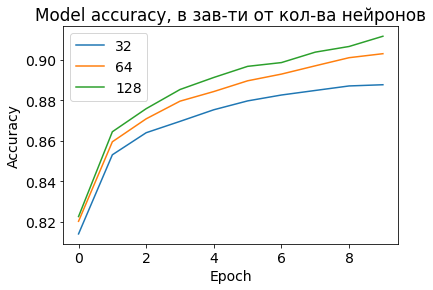

In [139]:
for his in history:
    plt.plot(his.history['accuracy'])
plt.title('Model accuracy, в зав-ти от кол-ва нейронов')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['32','64', '128'], loc='upper left')

plt.show()

### 2. Проверка количества слоев

In [144]:
def model_fash(layers_count, neurons_count):
    for i in range (0,layers_count-1):
        neur=64
        md = Sequential([keras.layers.Dense(neur, activation=tf.nn.relu)])
    print(f"Слоев: {layers_count}, нейронов в слое: {neur}")
    md.add(Dense(10, activation='softmax'))
    
    
    return md

In [145]:
history=[]
for i in [2, 3, 5, 10]:
    model=model_fash(i, 64)
    model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])                 
    history.append(model.fit(train_images, train_labels, verbose=1, epochs=10))
    score = model.evaluate(train_images, train_labels, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    

Слоев: 2, нейронов в слое: 64
Epoch 1/10
1875/1875 [==============================] - 1s 672us/step - loss: 0.6814 - accuracy: 0.7678
Epoch 2/10
1875/1875 [==============================] - 1s 669us/step - loss: 0.4052 - accuracy: 0.8556
Epoch 3/10
1875/1875 [==============================] - 1s 661us/step - loss: 0.3578 - accuracy: 0.8699
Epoch 4/10
1875/1875 [==============================] - 1s 664us/step - loss: 0.3354 - accuracy: 0.8782
Epoch 5/10
1875/1875 [==============================] - 1s 663us/step - loss: 0.3158 - accuracy: 0.8843
Epoch 6/10
1875/1875 [==============================] - 1s 672us/step - loss: 0.3081 - accuracy: 0.8876
Epoch 7/10
1875/1875 [==============================] - 1s 664us/step - loss: 0.2896 - accuracy: 0.8945
Epoch 8/10
1875/1875 [==============================] - 1s 660us/step - loss: 0.2805 - accuracy: 0.8943
Epoch 9/10
1875/1875 [==============================] - 1s 662us/step - loss: 0.2697 - accuracy: 0.8986
Epoch 10/10
1875/1875 [===========

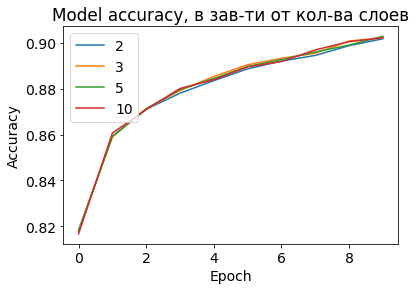

In [146]:
for his in history:
    plt.plot(his.history['accuracy'])
plt.title('Model accuracy, в зав-ти от кол-ва слоев')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['2','3', '5', '10'], loc='upper left')

plt.show()

### 3. Проверка различных оптимизаторов

In [150]:
def model_fash(layers_count, neurons_count):
    for i in range (0,layers_count-1):
        neur=neurons_count
        md = Sequential([keras.layers.Dense(neur, activation=tf.nn.relu)])
        print(f"Слоев: {layers_count}, нейронов в слое: {neur}")
    md.add(Dense(10, activation='softmax'))
    
    
    return md

In [152]:
history=[]
for optim in ['sgd', 'adam', 'rmsprop']:
    model=model_fash(2, 128)
    model.compile(optimizer=optim, 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])                 
    history.append(model.fit(train_images, train_labels, verbose=1, epochs=10))
    score = model.evaluate(train_images, train_labels, verbose=0)
    print('Optimizer:', optim)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print("---------------")
    

Слоев: 2, нейронов в слое: 128
Epoch 1/10
1875/1875 [==============================] - 1s 626us/step - loss: 0.9844 - accuracy: 0.6855
Epoch 2/10
1875/1875 [==============================] - 1s 635us/step - loss: 0.5275 - accuracy: 0.8216
Epoch 3/10
1875/1875 [==============================] - 1s 632us/step - loss: 0.4740 - accuracy: 0.8386
Epoch 4/10
1875/1875 [==============================] - 1s 625us/step - loss: 0.4507 - accuracy: 0.8435
Epoch 5/10
1875/1875 [==============================] - 1s 629us/step - loss: 0.4311 - accuracy: 0.8510
Epoch 6/10
1875/1875 [==============================] - 1s 617us/step - loss: 0.4156 - accuracy: 0.8569
Epoch 7/10
1875/1875 [==============================] - 1s 623us/step - loss: 0.4051 - accuracy: 0.8588
Epoch 8/10
1875/1875 [==============================] - 1s 630us/step - loss: 0.3932 - accuracy: 0.8631
Epoch 9/10
1875/1875 [==============================] - 1s 621us/step - loss: 0.3902 - accuracy: 0.8637
Epoch 10/10
1875/1875 [==========

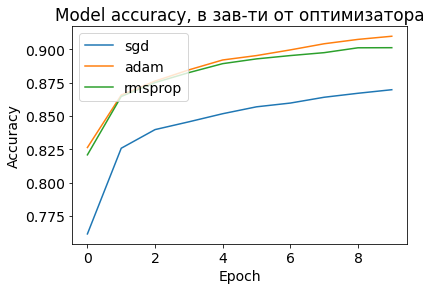

In [154]:
for his in history:
    plt.plot(his.history['accuracy'])
plt.title('Model accuracy, в зав-ти от оптимизатора')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['sgd', 'adam', 'rmsprop'], loc='upper left')

plt.show()

### Вывод:

1. На точность влияет более всего - epochs
2. Количество нейронов в слое влияет, по при существенном увеличении количества нейронов - точность фактически не увеличивается.
3. Количество слоев в данном датасете почти не изменило результаты.
4. Из трёх оптимизаторов - самый лучший результат показал adam.